In [1]:
import numpy as np
from classification import LogisticRegression
from regression import LinearRegression
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt

In [62]:
def make_dataset(task, n_features, n_informative, test_size=None, random_state=1):
    
    n_redundant = n_features - n_informative
    
    if task == 'classification':
        data = make_classification(n_features=n_features,
                                   n_redundant=n_redundant,
                                   n_informative=n_informative,
                                   random_state=random_state)
    elif task == 'regression':
        data = make_regression(n_features=n_features,
                               n_informative=n_informative,
                               noise=100.0,
                               random_state=random_state)
    else:
        raise Exception('Task {task} is not valid.')
    
    x_train = data[0]
    y_train = data[1]
    if test_size:
        if test_size < 0 or test_size > 1: raise Exception('Invalid test size')
            
        n = int(x_train.shape[0] * test_size)
        x_val, y_val = x_train[:n], y_train[:n]
        x_train, y_train = x_train[n:], y_train[n:]
        return (x_train, y_train), (x_val, y_val)
    
    return (x_train, y_train)

# Classification

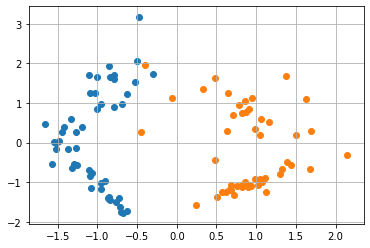

In [49]:
x_train, y_train = make_dataset('classification', n_features=2, n_informative=2, random_state=1)

plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1])
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1])
plt.grid()

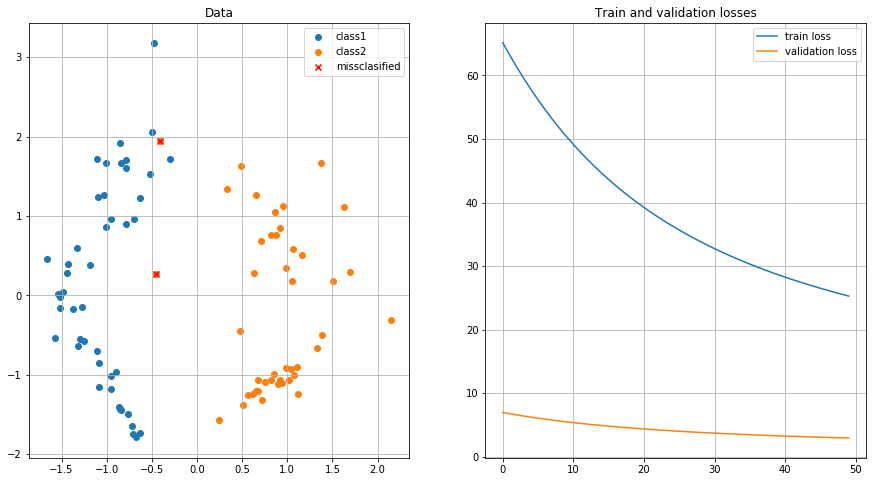

In [39]:
model = LogisticRegression()
model.fit(x_train, y_train, (x_val, y_val))

predictions = model.predict(x_train)
y_pred = np.zeros(predictions.shape)
y_pred[predictions >= 0.5] = 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].set_title('Data')
axes[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], label='class1')
axes[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], label='class2')
axes[0].scatter(x_train[y_pred != y_train, 0], x_train[y_pred != y_train, 1], color='r',
            marker='x', label='missclasified')
axes[0].grid()
axes[0].legend()

epochs = []
losses = []
val_losses = []
for epoch, loss in model.loss_.items():
    epochs.append(epoch)
    losses.append(loss)
for epoch, loss in model.val_loss_.items():
    val_losses.append(loss)

axes[1].set_title('Train and validation losses')
axes[1].plot(epochs, losses, label='train loss')
axes[1].plot(epochs, val_losses, label='validation loss')
axes[1].grid()
axes[1].legend()

# Regression

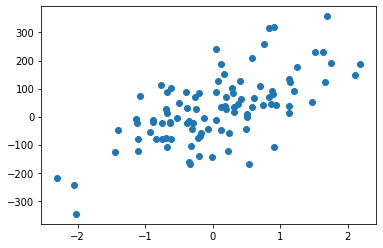

In [52]:
x_train, y_train = make_dataset('regression', n_features=1, n_informative=1, random_state=1)


plt.scatter(x_train.reshape(y_train.shape), y_train)

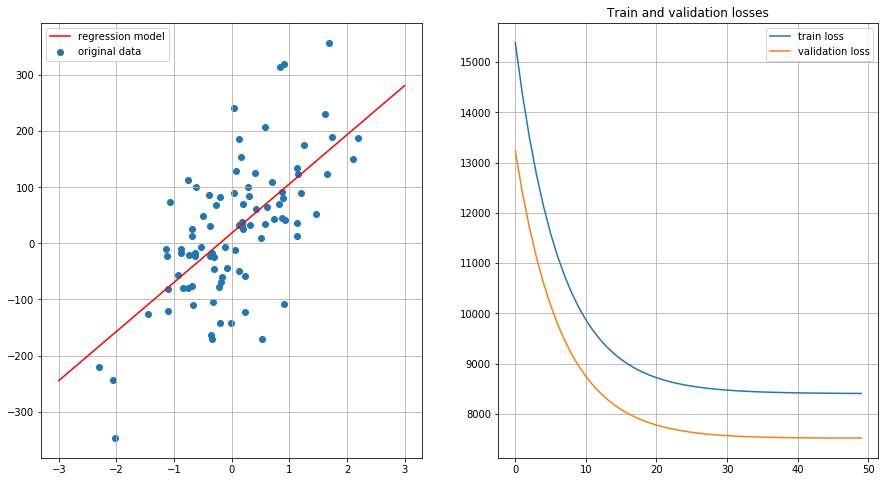

In [45]:
model = LinearRegression()
model.fit(x_train, y_train, validation_data=(x_val, y_val))

x = np.arange(-3, 4)
y = x*model.w_[1] + model.w_[0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].scatter(x_train.reshape(y_train.shape), y_train, label='original data')
axes[0].plot(x, y, color='r', label='regression model')
axes[0].grid()
axes[0].legend()

epochs = []
losses = []
val_losses = []
for epoch, loss in model.loss_.items():
    epochs.append(epoch)
    losses.append(loss)
for epoch, loss in model.val_loss_.items():
    val_losses.append(loss)

axes[1].set_title('Train and validation losses')
axes[1].plot(epochs, losses, label='train loss')
axes[1].plot(epochs, val_losses, label='validation loss')
axes[1].grid()
axes[1].legend()